# En este archivo Jupyter se van a revisar los dataframes recibidos y se realizará el EDA

In [1]:
import pandas as pd
import openpyxl
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import numpy as np
import os
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore
warnings.filterwarnings("ignore")


## Comenzamos con el dataset de distance_km

In [2]:
df_distance_km = pd.read_excel('../dataset/df_distance_km.xlsx')
df_distance_km.head(5)

,CLIENTES,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,Cliente_1,0.0000,7.5625,15.5365,1.1998,4.7145,1.7407,7.9408,17.1947,4.2933,...,6.0225,5.4470,2.2133,11.1505,1.5775,10.8288,9.1456,20.4871,22.1445,3.6114
1,Cliente_2,7.5625,0.0000,3.3838,7.7433,14.5720,8.5237,0.4847,13.7974,10.1522,...,10.1049,2.6961,13.4907,18.0835,7.0275,19.8218,8.2737,9.6369,19.1038,10.7361
2,Cliente_3,15.5365,3.3838,0.0000,12.5438,0.0000,0.0000,0.0000,16.0355,13.9120,...,12.3430,5.0114,15.7289,17.9217,9.6824,22.0599,10.5118,7.7574,16.5997,13.9021
3,Cliente_4,1.1998,7.7433,12.5438,0.0000,5.0721,0.9119,7.5798,17.4095,3.5781,...,6.2330,4.7117,2.8799,11.3610,1.3127,11.1926,9.3561,20.7019,21.1518,3.3673
4,Cliente_5,4.7145,14.5720,0.0000,5.0721,0.0000,4.8187,0.0000,0.0000,0.0000,...,6.8738,9.1064,3.6476,12.0019,5.4347,5.2872,9.9969,21.3384,25.5947,4.5417


### Comprobamos el tipo de datos del dataframe y revisamos que no existean valores nulos.

In [3]:
df_distance_km.isna().sum()

CLIENTES      0
Cliente_1     0
Cliente_2     0
Cliente_3     0
Cliente_4     0
Cliente_5     0
Cliente_6     0
Cliente_7     0
Cliente_8     0
Cliente_9     0
Cliente_10    0
Cliente_11    0
Cliente_12    0
Cliente_13    0
Cliente_14    0
Cliente_15    0
Cliente_16    0
Cliente_17    0
Cliente_18    0
Cliente_19    0
Cliente_20    0
Almacén       0
dtype: int64

In [4]:
df_distance_km.dtypes

CLIENTES       object
Cliente_1     float64
Cliente_2     float64
Cliente_3     float64
Cliente_4     float64
Cliente_5     float64
Cliente_6     float64
Cliente_7     float64
Cliente_8     float64
Cliente_9     float64
Cliente_10    float64
Cliente_11    float64
Cliente_12    float64
Cliente_13    float64
Cliente_14    float64
Cliente_15    float64
Cliente_16    float64
Cliente_17    float64
Cliente_18    float64
Cliente_19    float64
Cliente_20    float64
Almacén       float64
dtype: object

Al revisar los datos comprobamos que es una matriz de distancias donde en relaciones entre dos puntos si el valor es 0 es que no existe una ruta entre ambos puntos.
Todos los datos del dataset son float y no existen valores nulos, por tanto no es necesario realizar modificaciones al dataset.

## Graficamos la información para poder ver los distintos nodos y los nodos a los que se conectan

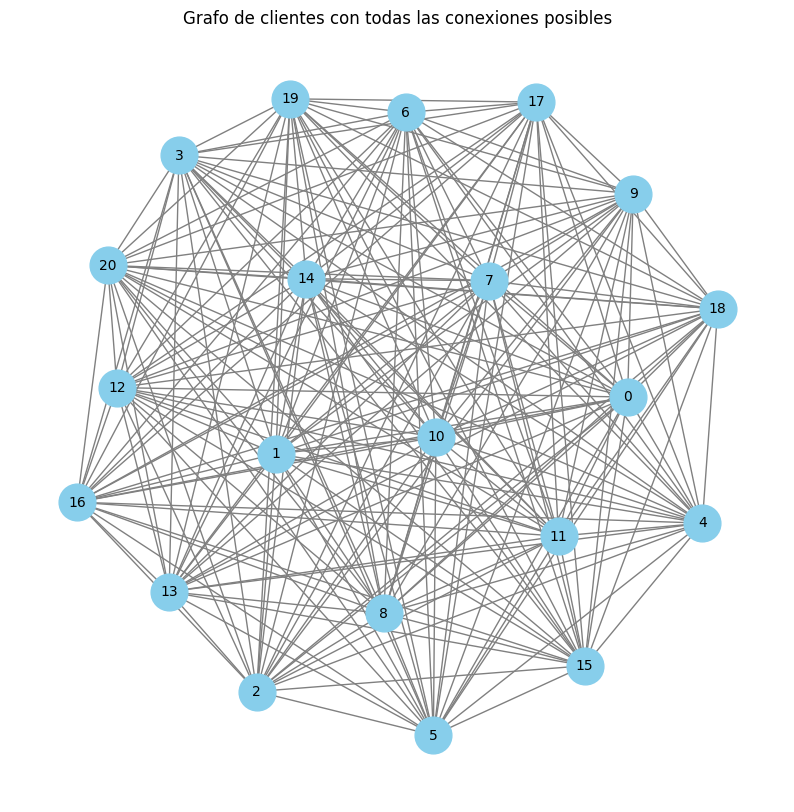

In [5]:
G = nx.Graph()

# Agregar nodos
G.add_nodes_from(df_distance_km.index)

# Agregar todas las conexiones posibles (grafo completo)
for cliente1 in df_distance_km.index:
    for cliente2 in df_distance_km.index:
        if cliente1 != cliente2:  # Evitar loops (autoconexiones)
            G.add_edge(cliente1, cliente2)

# Dibujar el grafo
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout para posicionar los nodos
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Ajustar y mostrar el gráfico
plt.title("Grafo de clientes con todas las conexiones posibles")
plt.axis('off')
plt.show()

## Analisis del dataset de distance_min

In [6]:
df_distance_min = pd.read_excel("../dataset/df_distance_min.xlsx")
df_distance_min.head(5)

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.000000,15.731667,19.651667,2.543333,7.550000,3.760000,15.838333,22.388333,8.563333,7.185000,...,10.028333,12.336667,5.098333,17.525000,2.943333,15.548333,15.105000,23.855000,23.700000,6.905000
1,15.731667,0.000000,7.505000,15.798333,17.241667,17.316667,1.248333,20.700000,21.325000,13.503333,...,14.423333,6.695000,15.891667,20.061667,14.023333,26.153333,14.803333,14.235000,21.908333,20.381667
2,19.651667,7.505000,0.000000,19.285000,0.000000,0.000000,0.000000,22.076667,19.981667,17.378333,...,15.800000,11.541667,17.270000,20.405000,18.500000,27.531667,16.181667,13.023333,18.080000,20.873333
3,2.543333,15.798333,19.285000,0.000000,8.533333,1.878333,16.521667,22.863333,7.165000,7.013333,...,10.501667,10.768333,6.181667,18.000000,2.465000,16.546667,15.580000,24.328333,23.030000,7.400000
4,7.550000,17.241667,0.000000,8.533333,0.000000,9.711667,0.000000,0.000000,0.000000,11.058333,...,8.793333,18.555000,7.391667,16.291667,10.738333,9.998333,13.871667,22.620000,28.093333,7.938333


### Comprobamos el tipo de datos del dataset y que no existan valores nulos.

In [7]:
df_distance_min.isna().sum()

Cliente_1     0
Cliente_2     0
Cliente_3     0
Cliente_4     0
Cliente_5     0
Cliente_6     0
Cliente_7     0
Cliente_8     0
Cliente_9     0
Cliente_10    0
Cliente_11    0
Cliente_12    0
Cliente_13    0
Cliente_14    0
Cliente_15    0
Cliente_16    0
Cliente_17    0
Cliente_18    0
Cliente_19    0
Cliente_20    0
Almacén       0
dtype: int64

In [8]:
df_distance_min.dtypes

Cliente_1     float64
Cliente_2     float64
Cliente_3     float64
Cliente_4     float64
Cliente_5     float64
Cliente_6     float64
Cliente_7     float64
Cliente_8     float64
Cliente_9     float64
Cliente_10    float64
Cliente_11    float64
Cliente_12    float64
Cliente_13    float64
Cliente_14    float64
Cliente_15    float64
Cliente_16    float64
Cliente_17    float64
Cliente_18    float64
Cliente_19    float64
Cliente_20    float64
Almacén       float64
dtype: object

Tras la revisión de los datos comprobamos que el dataset no dispone de valores nulos y que todos sus valores son float. Al ser una matriz de distancias en tiempo entre los distintos nodos no hace falta realizar modificaciones al dataset.

## Graficamos la información del dataset para poder los nodos y sus conexiones.

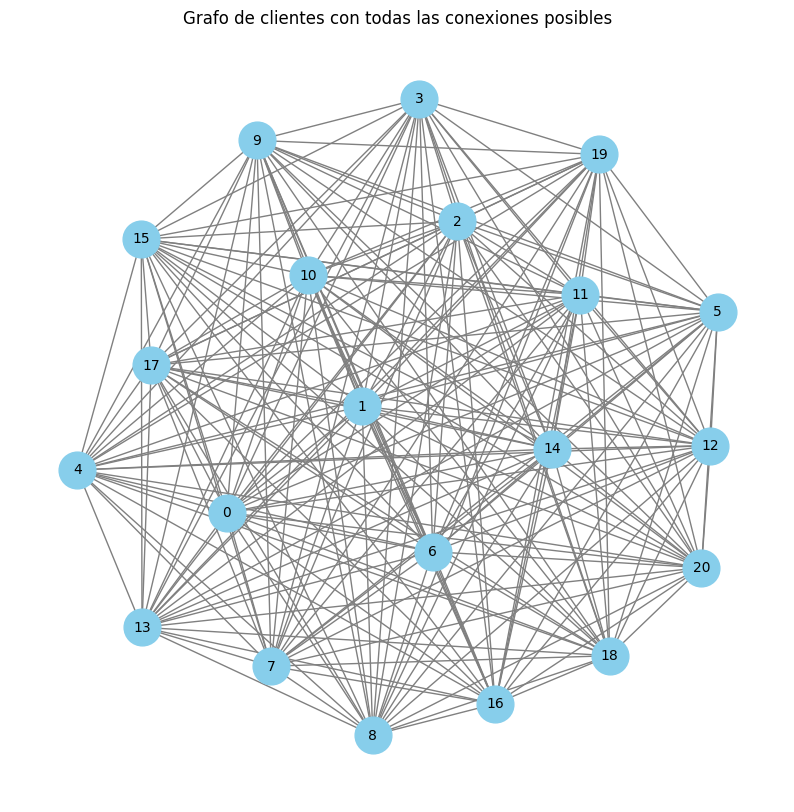

In [9]:
G = nx.Graph()

# Agregar nodos
G.add_nodes_from(df_distance_min.index)

# Agregar todas las conexiones posibles (grafo completo)
for cliente1 in df_distance_min.index:
    for cliente2 in df_distance_min.index:
        if cliente1 != cliente2:  # Evitar loops (autoconexiones)
            G.add_edge(cliente1, cliente2)

# Dibujar el grafo
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout para posicionar los nodos
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Ajustar y mostrar el gráfico
plt.title("Grafo de clientes con todas las conexiones posibles")
plt.axis('off')
plt.show()

## Analisis historic_order_demands

In [10]:
df_historic_order_demands = pd.read_excel("../dataset/df_historic_order_demand.xlsx")
df_historic_order_demands.head(5)

,cliente,mes_anio,order_demand
0,Cliente_1,12-2020,857.0
1,Cliente_2,12-2020,941.0
2,Cliente_3,12-2020,878.0
3,Cliente_4,12-2020,949.0
4,Cliente_5,12-2020,932.0


### Comprobamos el tipo de datos del dataset y que no existan valores nulos.

In [11]:
df_historic_order_demands.isna().sum()

cliente          0
mes_anio         0
order_demand    48
dtype: int64

In [12]:
df_historic_order_demands.count()

cliente         980
mes_anio        980
order_demand    932
dtype: int64

### Existen 48 registros nulos en la columna order_demand. Al ser un 4.9% de los datos valores nulos procedemos a eliminarlos.

In [13]:
df_historic_order_demands.dropna(inplace=True)

# Analisis locations

In [14]:
df_location = pd.read_excel("../dataset/df_location.xlsx")
df_location.head(5)

,Cliente,Latitud,Longitud
0,Cliente_1,40.402828,-3.696878
1,Cliente_2,40.455820,-3.700350
2,Cliente_3,40.471840,-3.708079
3,Cliente_4,40.404688,-3.706262
4,Cliente_5,40.371990,-3.695056


El dataset de locations es un dataset con las ubicaciones geograficas de todos los clientes y del almacén.

Comprobamos que no tenga ningún valor nulo.

In [15]:
df_location.isna().sum()

Cliente     0
Latitud     0
Longitud    0
dtype: int64

Ubicamos todas las coordenadas de todos los clientes en un mapa para poder visualizar en que ubicación geográfica se encuentran.

In [16]:
df = px.data.carshare()
fig = px.scatter_map(df_location, lat="Latitud", lon="Longitud",     color="Cliente",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

# Analisis dataframe orders

In [17]:
df_orders = pd.read_excel("../dataset/df_orders.xlsx")
df_orders.head(5)

,cliente,mes_anio,order_demand
0,Cliente_1,12-2024,909
1,Cliente_2,12-2024,959
2,Cliente_3,12-2024,960
3,Cliente_4,12-2024,980
4,Cliente_5,12-2024,979


Comprobamos el tipo de datos de cada una de las columnas y si existen valores nulos.

In [18]:
df_orders.isna().sum()

cliente         0
mes_anio        0
order_demand    0
dtype: int64

In [19]:
df_orders.dtypes

cliente         object
mes_anio        object
order_demand     int64
dtype: object

En este caso son todo ordenes del mes 12-2024. Por tanto no es necesario realizar nuevas modificaciones. Vamos a proceder a usar el metodo describe de pandas para poder ver datos generales de la columna order_demand

In [20]:
df_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
order_demand,20.0,936.9,32.736427,881.0,908.75,940.0,965.0,980.0


# Analisis dataset Vehicle

In [21]:
df_vehicle = pd.read_excel("../dataset/df_vehicle.xlsx")
df_vehicle.head(5)

,vehiculo_id,capacidad_kg,costo_km,autonomia_km
0,1,2026,0.20,603
1,2,4362,0.14,630
2,3,4881,0.20,664
3,4,3321,0.19,514
4,5,10000,0.32,350


El dataset vehicle es un dataset con información sobre la flota de vehiculos de la empresa así como la capacidad, el costo por km y la autonomía de cada vehículo.
Valos a revisar que no existan valores nulos y que todos los vehiculos tengan tipos de datos enteros o flotantes para poder usarlos correctamente.

In [22]:
df_vehicle.isna().sum()

vehiculo_id     0
capacidad_kg    0
costo_km        0
autonomia_km    0
dtype: int64

In [23]:
df_vehicle.dtypes

vehiculo_id       int64
capacidad_kg      int64
costo_km        float64
autonomia_km      int64
dtype: object

# EDA

Análisis Estadístico Descriptivo (EDA)
1. Resumen Estadístico
Proporcionaremos medidas de tendencia central y dispersión para todas las variables relevantes en los DataFrames.
2. Visualización
Crearemos histogramas, gráficos de caja y gráficos de dispersión para identificar patrones y distribuciones.
3. Identificación de Valores Atípicos
Detectaremos valores atípicos mediante métricas estadísticas y visualizaciones, como gráficos de caja.

In [24]:
df_location = pd.read_excel('../dataset/df_location.xlsx')
df_orders = pd.read_excel('../dataset/df_orders.xlsx')
df_vehicle = pd.read_excel('../dataset/df_vehicle.xlsx')
df_distance_km = pd.read_excel('../dataset/df_distance_km.xlsx')

In [25]:
# 1. Resumen Estadístico

# Resumen Estadístico para todos los DataFrames
def summarize_dataframes(df_list, names):
    for df, name in zip(df_list, names):
        print(f"Resumen Estadístico de {name}:")
        print(df.describe())
        print("\n")

# Lista de DataFrames y sus nombres
dataframes = [df_location, df_vehicle, df_orders, df_distance_km]
names = ["Ubicaciones (df_location)", "Vehículos (df_vehicle)", "Pedidos (df_orders)", "Distancias (df_distance_km)"]

# Resumen Estadístico
summarize_dataframes(dataframes, names)


Resumen Estadístico de Ubicaciones (df_location):
         Latitud   Longitud
count  21.000000  21.000000
mean   40.419163  -3.693152
std     0.040199   0.045856
min    40.334024  -3.814595
25%    40.389637  -3.708079
50%    40.409083  -3.700350
75%    40.446872  -3.677859
max    40.512445  -3.586515


Resumen Estadístico de Vehículos (df_vehicle):
       vehiculo_id  capacidad_kg  costo_km  autonomia_km
count     6.000000      6.000000  6.000000      6.000000
mean      3.500000   4619.833333  0.198333    592.000000
std       1.870829   2818.453577  0.065853    148.995302
min       1.000000   2026.000000  0.140000    350.000000
25%       2.250000   3177.000000  0.152500    536.250000
50%       3.500000   3841.500000  0.195000    616.500000
75%       4.750000   4751.250000  0.200000    655.500000
max       6.000000  10000.000000  0.320000    791.000000


Resumen Estadístico de Pedidos (df_orders):
       order_demand
count     20.000000
mean     936.900000
std       32.736427
min      8

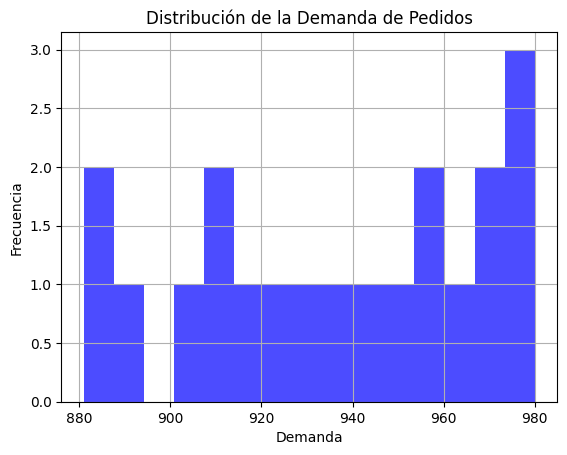

In [26]:
# 2. Visualización
# (a) Histogramas

# Histograma de órdenes
plt.hist(df_orders['order_demand'], bins=15, color='blue', alpha=0.7)
plt.title("Distribución de la Demanda de Pedidos")
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

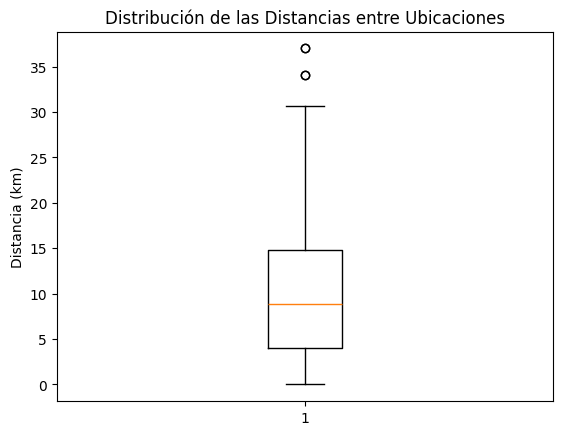

In [27]:
# (b) Gráficos de Caja

# Gráfico de Caja para las distancias entre ubicaciones
plt.boxplot(df_distance_km.iloc[:, 1:].values.flatten())
plt.title("Distribución de las Distancias entre Ubicaciones")
plt.ylabel("Distancia (km)")
plt.show()


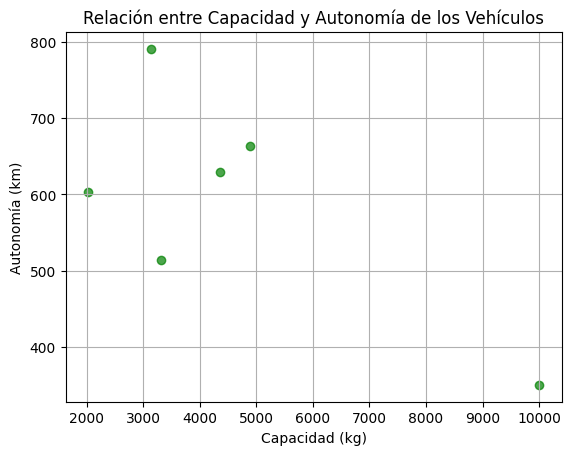

In [28]:
# (c) Gráficos de Dispersión

# Gráfico de Dispersión: Capacidad vs Autonomía de los Vehículos
plt.scatter(df_vehicle['capacidad_kg'], df_vehicle['autonomia_km'], c='green', alpha=0.7)
plt.title("Relación entre Capacidad y Autonomía de los Vehículos")
plt.xlabel("Capacidad (kg)")
plt.ylabel("Autonomía (km)")
plt.grid(True)
plt.show()


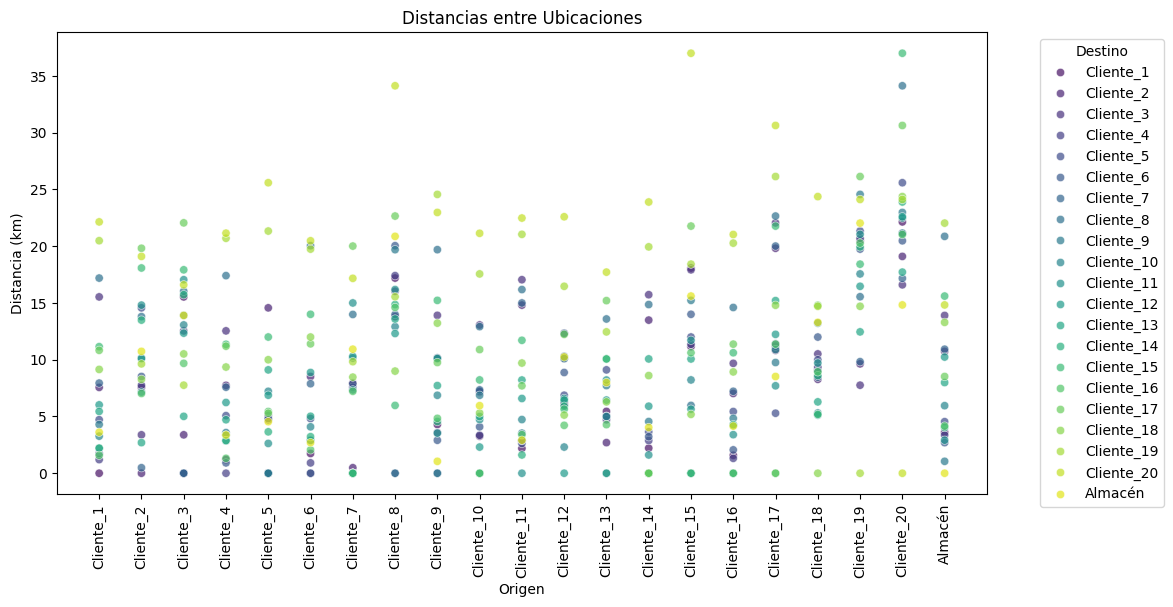

In [29]:
# Gráfico de dispersión para pares de distancias
distances_flat = df_distance_km.set_index('CLIENTES').stack().reset_index()
distances_flat.columns = ['Origen', 'Destino', 'Distancia']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=distances_flat, x='Origen', y='Distancia', hue='Destino', palette='viridis', alpha=0.7)
plt.title("Distancias entre Ubicaciones")
plt.xlabel("Origen")
plt.ylabel("Distancia (km)")
plt.xticks(rotation=90)
plt.legend(title="Destino", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. Identificación de Valores Atípicos

In [30]:
# Identificación de Valores Atípicos en 'order_demand' usando IQR
Q1 = df_orders['order_demand'].quantile(0.25)
Q3 = df_orders['order_demand'].quantile(0.75)
IQR = Q3 - Q1

# Rango de valores aceptables
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df_orders[(df_orders['order_demand'] < lower_bound) | (df_orders['order_demand'] > upper_bound)]
print("Valores Atípicos en 'order_demand':")
print(outliers)

Valores Atípicos en 'order_demand':
Empty DataFrame
Columns: [cliente, mes_anio, order_demand]
Index: []
